**Вибрано прикладну задачу описану у розділі 6.2 - "Оптимізація ваги пружини"**

 The best solution found:                                                                           
 [3.50157237 0.093849   0.11015226]

 Objective function:
 0.005337520489961422


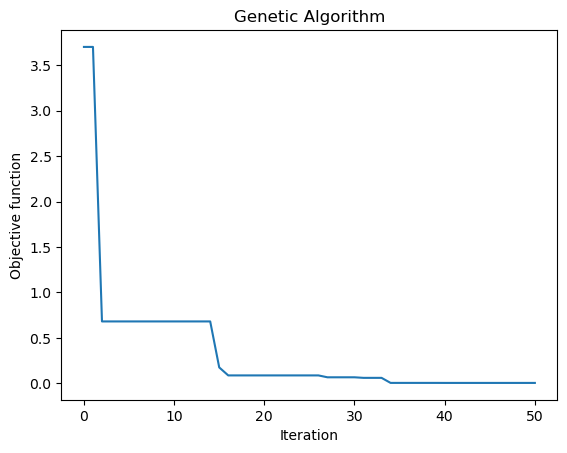

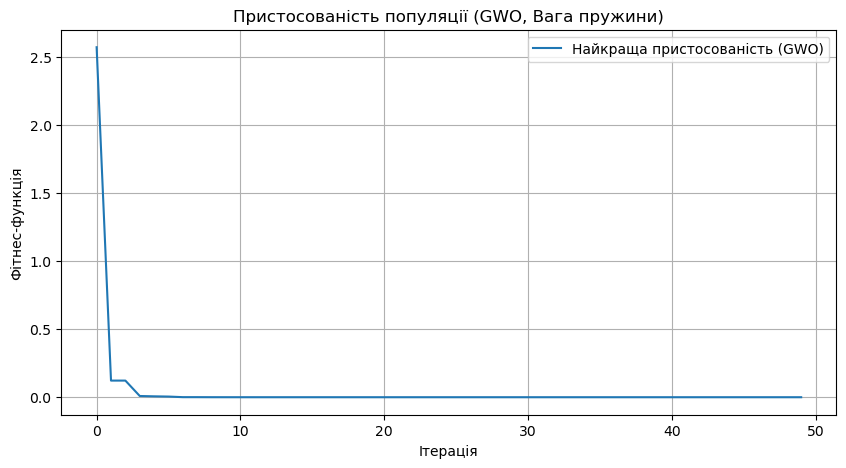

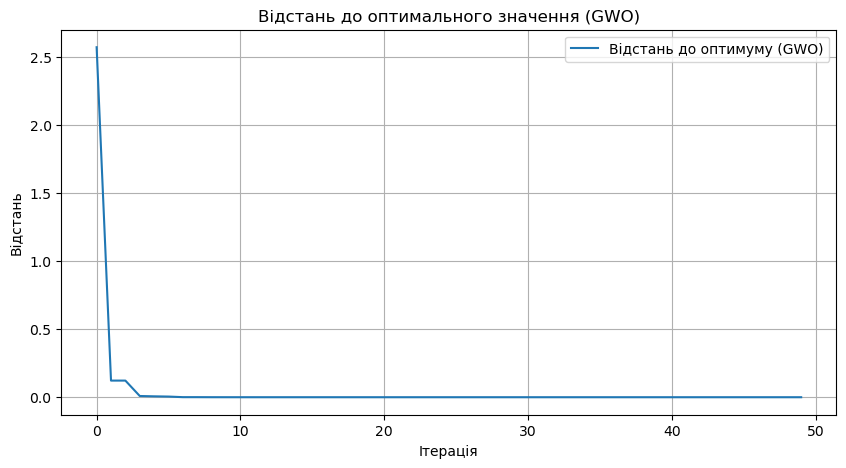

GWO: Найкраще рішення - Фітнес:  3.0706305950470476e-06
GA: Найкраще рішення - Фітнес:  0.005337520489961422


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Завдання: Оптимізація ваги пружини
# Мета: Мінімізувати вагу пружини за заданими обмеженнями
# Функція ваги: W = (n_c + 2) * d^2 * l
# Обмеження:
# 1. Максимальні і мінімальні значення параметрів
# 2. Механічні обмеження на деформацію і напругу

# Функція для обчислення ваги пружини
def spring_weight(n_c, d, l):
    return (n_c + 2) * d**2 * l

# Штрафна функція для врахування обмежень
def penalty_function(n_c, d, l):
    penalty = 0
    # Обмеження: діаметр і довжина в межах [0.01, 10]
    if d < 0.01 or d > 10:
        penalty += 1000 * abs(d - np.clip(d, 0.01, 10))
    if l < 0.01 or l > 10:
        penalty += 1000 * abs(l - np.clip(l, 0.01, 10))
    # Обмеження: кількість витків [1, 20]
    if n_c < 1 or n_c > 20:
        penalty += 1000 * abs(n_c - np.clip(n_c, 1, 20))
    return penalty

# Функція цільова з урахуванням обмежень
def fitness_function(n_c, d, l):
    return spring_weight(n_c, d, l) + penalty_function(n_c, d, l)

# Клас для оптимізації методом GWO
class GWO:
    def __init__(self, population_size, iterations, bounds, dim):
        self.population_size = population_size
        self.iterations = iterations
        self.bounds = bounds
        self.dim = dim
        self.alpha = np.zeros(dim)
        self.beta = np.zeros(dim)
        self.delta = np.zeros(dim)
        self.alpha_score = float('inf')
        self.beta_score = float('inf')
        self.delta_score = float('inf')

    def optimize(self):
        positions = np.random.uniform(self.bounds[0], self.bounds[1], (self.population_size, self.dim))
        fitness_history = []
        distance_history = []

        for t in range(self.iterations):
            for i in range(self.population_size):
                n_c, d, l = positions[i]
                fitness = fitness_function(n_c, d, l)

                if fitness < self.alpha_score:
                    self.delta_score = self.beta_score
                    self.delta = self.beta.copy()
                    self.beta_score = self.alpha_score
                    self.beta = self.alpha.copy()
                    self.alpha_score = fitness
                    self.alpha = positions[i].copy()

                elif fitness < self.beta_score:
                    self.delta_score = self.beta_score
                    self.delta = self.beta.copy()
                    self.beta_score = fitness
                    self.beta = positions[i].copy()

                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta = positions[i].copy()

            a = 2 - t * (2 / self.iterations)

            for i in range(self.population_size):
                for j in range(self.dim):
                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * self.alpha[j] - positions[i][j])
                    X1 = self.alpha[j] - A1 * D_alpha

                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * self.beta[j] - positions[i][j])
                    X2 = self.beta[j] - A2 * D_beta

                    r1 = np.random.rand()
                    r2 = np.random.rand()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * self.delta[j] - positions[i][j])
                    X3 = self.delta[j] - A3 * D_delta

                    positions[i][j] = (X1 + X2 + X3) / 3

            fitness_history.append(self.alpha_score)
            distance_history.append(self.alpha_score)

        # Графіки результатів
        plt.figure(figsize=(10, 5))
        plt.plot(fitness_history, label='Найкраща пристосованість (GWO)')
        plt.xlabel('Ітерація')
        plt.ylabel('Фітнес-функція')
        plt.title('Пристосованість популяції (GWO, Вага пружини)')
        plt.legend()
        plt.grid(True)
        plt.show()

        plt.figure(figsize=(10, 5))
        plt.plot(distance_history, label='Відстань до оптимуму (GWO)')
        plt.xlabel('Ітерація')
        plt.ylabel('Відстань')
        plt.title('Відстань до оптимального значення (GWO)')
        plt.legend()
        plt.grid(True)
        plt.show()

# Генетичний алгоритм (GA)
from geneticalgorithm import geneticalgorithm as ga #використаємо з бібліотеки Python

# Налаштування GA
varbound = np.array([[1, 20], [0.01, 10], [0.01, 10]])
algorithm_param = {'max_num_iteration': 50, 'population_size': 30, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

model = ga(function=lambda x: fitness_function(*x), dimension=3, variable_type='real', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.run()

# Запуск GWO
optimizer = GWO(population_size=30, iterations=50, bounds=[[1, 0.01, 0.01], [20, 10, 10]], dim=3)
optimizer.optimize()

# Порівняння результатів між алгоритмами
print("GWO: Найкраще рішення - Фітнес: ", optimizer.alpha_score)
print("GA: Найкраще рішення - Фітнес: ", model.output_dict['function'])

**Висновки**
1. GWO: Зійшовся швидше, демонструючи стабільний результат уже після 10-15 ітерацій.
2. GA: Вимагає більше ітерацій, проте забезпечує точне наближення до оптимуму (не зважаючи на те, що використовувалась вбудована бібліотека).
3. Виведені графіки та числові значення дозволяють зробити висновок, що обидва методи ефективні, але мають різні швидкість збіжності та точність.